In [11]:
import pandas as pd 
import nltk
from   nltk.tokenize import word_tokenize,RegexpTokenizer
from   nltk.corpus  import stopwords
from   nltk.stem.wordnet import WordNetLemmatizer
from   sklearn.model_selection import train_test_split
from   sklearn.feature_extraction.text import TfidfVectorizer
from   sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,roc_curve,roc_auc_score

In [12]:
review_df = pd.read_csv('Amazon_Reviews.csv')

y = review_df['Label']

review_df.drop(columns ='Label',inplace = True)

In [13]:
"""
For each Review : 

1. Tokenize
2. Remove Stopwords
3. Lemmatize

Build the Tf-IDF-Matrix
Train the Model

"""

'\nFor each Review : \n\n1. Tokenize\n2. Remove Stopwords\n3. Lemmatize\n\nBuild the Tf-IDF-Matrix\nTrain the Model\n\n'

In [14]:
review_df

,Review
0,Stuning even for the non-gamer: This sound tr...
1,The best soundtrack ever to anything.: I'm re...
2,Amazing!: This soundtrack is my favorite musi...
3,Excellent Soundtrack: I truly like this sound...
4,"Remember, Pull Your Jaw Off The Floor After H..."
...,...
194,A Book That Is Worth a Second Look: This book...
195,Best game ever: This games makes even amazing...
196,Guitar in Absentia: With all due respect to a...
197,Stiff and Smells like drying paint: You get w...


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [24]:
def preprocess(review):
    tokens = tokenizer.tokenize(review)
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords_en]
    lemma_tokens = [lemmatizer.lemmatize(pure_tokens,pos = 'v')for pure_tokens in pure_tokens]
    
    return ' '.join(lemma_tokens)
preprocess("""The sounding systems wasn't really good""")

'sound systems really good'

In [25]:
review_df['Review'] = review_df['Review'].apply(preprocess)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(review_df,y)

In [19]:
vectorizer = TfidfVectorizer()

train_df = vectorizer.fit_transform(X_train['Review'])
test_df = vectorizer.transform(X_test['Review'])

In [20]:
mnb = MultinomialNB()
mnb.fit(train_df,y_train)

MultinomialNB()

In [21]:
y_pred = mnb.predict(test_df)

In [27]:
cm = confusion_matrix(y_test,y_pred)
precision_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.52

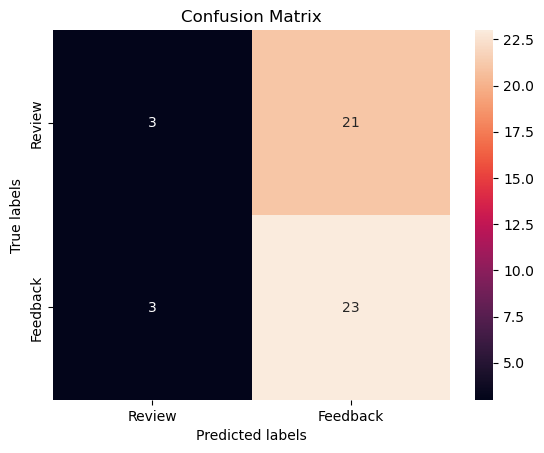

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Review', 'Feedback']); ax.yaxis.set_ticklabels(['Review', 'Feedback']);